# APS1070
#### Linear Regression - Project 4

## Linear Regression - Assignment


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score

In [0]:
from sklearn.datasets import load_boston
dataset = load_boston()

In [0]:
print(dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [0]:
print(dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [0]:
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [0]:
df['MEDV'] = dataset.target

### Question 1

1. Normalize the data using StandardScaler from sklearn. [0.5]
2. Split the multivariate data into training/validation data (20% validation data) and plot train error and validation error as a function of the lambda regularizer. [1]
3. What is the best lambda where the best fit occurs? Use this best lambda from here on out. [Note: You may be surprised by the best lambda here - this won't be the case for all datasets.] [1]
-----> The lambda value obtained in this case is 0. 

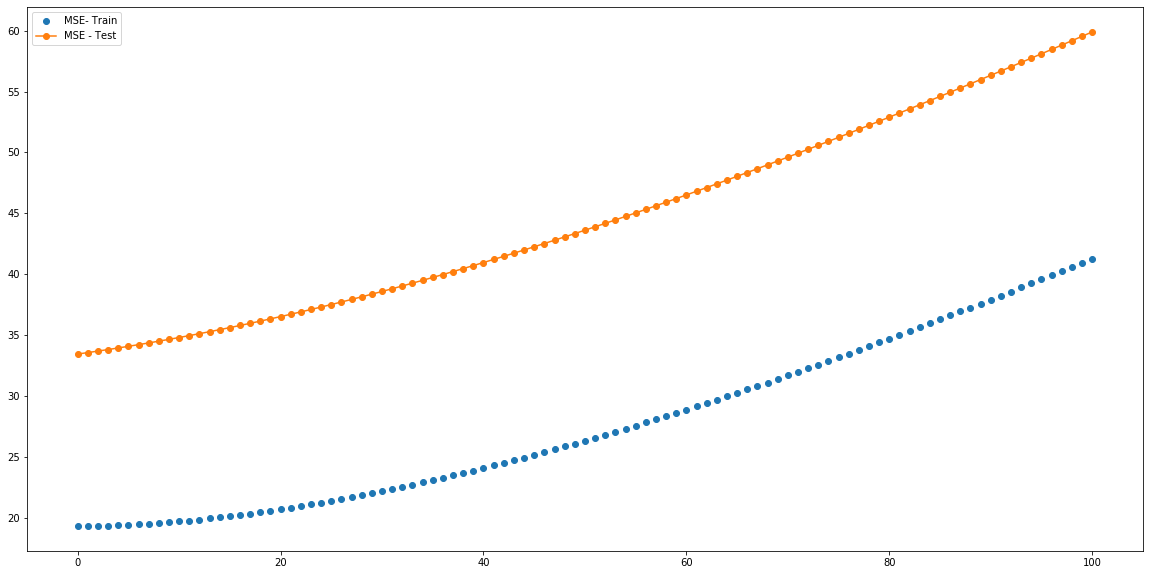

In [0]:
#1. Normalize the data
#2.Splitting the multivariate data
X = df.drop('MEDV', axis = 1)
y = df['MEDV']

#Scaling the training and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

#adding the identity matrix
X_train_stdr = np.hstack((np.ones(np.size(X_train_std,0)).reshape(-1,1), X_train_std))
X_test_stdr = np.hstack((np.ones(np.size(X_test_std,0)).reshape(-1,1), X_test_std))

#Calculation of test and train errors

MSEtrain = []
MSEtest = []
for λ in range(0,101):
  f = 14
  w = np.dot(np.linalg.inv(np.dot(X_train_stdr.T, X_train_stdr) + (λ)*np.identity(f)), np.dot(X_train_stdr.T, y_train))
  yPredtrain = np.dot(X_train_stdr, w)
  yPredtest = np.dot(X_test_stdr,w)
  MSEtrain.append(mean_squared_error(yPredtrain, y_train))
  MSEtest.append(mean_squared_error(yPredtest, y_test))


MSEtrain = np.asarray(MSEtrain)
MSEtest = np.asarray(MSEtest)
λ_array = np.arange(0, 101)

#Plotting the errors and lambda values
plt.figure(figsize = (20,10))
plt.plot(λ_array, MSEtrain, 'o', label='MSE- Train')
plt.plot(λ_array, MSEtest, 'o-', label='MSE - Test')
plt.legend()
plt.show()

### Question 2

1. Derive the gradient of the $L_2$ regularized objective for Linear Regression, $\frac{\partial}{\partial \theta_j}J(\theta)$. Show your work (either by using in-line equations like we do here, or taking a picture of your work, and emdedding it in the notebook). [1]

![Question 2](https://drive.google.com/uc?id=1_cwBlJhOYZRa3TjAhHua7AIGEqZO9b4s)

### Question 3


1. Implement batch gradient descent for linear regression using a fixed learning rate $\eta$ of 1e-2. [1.5]

2. Run the gradient descent for a fixed number of epochs (based on convergence) and verify that the results closely approximate the matrix solution with the same lambda. [1]

In [0]:
#1. Implementing Gradient Descent
y_train = np.asarray(y_train)
y_train = y_train.reshape(-1,1)

def grad_descent(X,y,λ,learning_rate,iterations):
    mse_gradientdescent = [] 
    m = len(y_train)
    np.random.seed(0)
    w_random = np.random.randn(14,1)
    #w_random = np.zeros([np.size(X,1),1])
    for n in range(0, iterations):
      ypred_gd = np.dot(X_train_stdr, w_random)
      w_random = w_random - learning_rate*(1/m)*(np.dot(X_train_stdr.T, (ypred_gd -y_train))+(λ* w_random))
      mse_gradientdescent.append(mean_squared_error(ypred_gd, y))
    return w_random, mse_gradientdescent



In [0]:
#Calling the defined function
w_gradientdescent, mse_graddesc = grad_descent(X_train_stdr, y_train, λ = 0, learning_rate=0.01, iterations = 8000)
print(w_gradientdescent)

[[22.61188119]
 [-0.97018214]
 [ 1.05605457]
 [ 0.0346885 ]
 [ 0.59500069]
 [-1.85418622]
 [ 2.57384929]
 [-0.08814087]
 [-2.88093293]
 [ 2.10369872]
 [-1.86569928]
 [-2.29239424]
 [ 0.71800336]
 [-3.59216972]]


In [0]:
#2. Comparison of analytical solution w with the gradient descent solution w
λ = 0
f = 14
w = np.dot(np.linalg.inv(np.dot(X_train_stdr.T, X_train_stdr) + (λ)*np.identity(f)), np.dot(X_train_stdr.T, y_train))

for r in range(14): #for numbers of features
  percentage_convergence = ((w[r] - w_gradientdescent[r])/w[r]) * 100
  print("The percentage comparison of the value",[r]," in question 1 and 3 are:", abs(percentage_convergence))



The percentage comparison of the value [0]  in question 1 and 3 are: [7.69873894e-13]
The percentage comparison of the value [1]  in question 1 and 3 are: [0.06572334]
The percentage comparison of the value [2]  in question 1 and 3 are: [0.10350084]
The percentage comparison of the value [3]  in question 1 and 3 are: [9.45549798]
The percentage comparison of the value [4]  in question 1 and 3 are: [0.08313865]
The percentage comparison of the value [5]  in question 1 and 3 are: [0.05182242]
The percentage comparison of the value [6]  in question 1 and 3 are: [0.02447789]
The percentage comparison of the value [7]  in question 1 and 3 are: [0.59966864]
The percentage comparison of the value [8]  in question 1 and 3 are: [0.00033547]
The percentage comparison of the value [9]  in question 1 and 3 are: [0.40462639]
The percentage comparison of the value [10]  in question 1 and 3 are: [0.51361717]
The percentage comparison of the value [11]  in question 1 and 3 are: [0.01627327]
The percen

### Question 4

1. Plot training error performance vs. number of epochs as a function of learning rate $\eta$ for a range of values {1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1} with each $\eta$ being a different line. [1]

For very low $\eta$, gradient descent should be slow to converge.  For very high $\eta$, the error might be very unstable (i.e., not decreasing on every epoch).

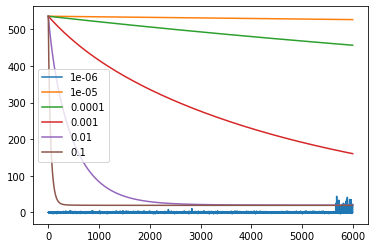

In [0]:
learning_rate_6 = [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1]
learning_rate_6 = np.asarray(learning_rate_6)
iterations_6 = 6000 
mse_6 = np.empty([1, iterations_6]) #setting up an empty array for errors
for p in range(0,6):
  w_gradientdescent_1, mse_ = grad_descent(X_train_stdr, y_train, λ=0, learning_rate = learning_rate_6[p], iterations = iterations_6)
  mse_ = np.asarray(mse_)
  mse_6 = np.vstack((mse_6, mse_)) #Stacking all the errors
  
np.delete(mse_6, 0, 0)
iterations_6_ = np.arange(0, iterations_6)
for t in range(0, 6):
  plt.plot(iterations_6_, mse_6[t], label = learning_rate_6[t])
  plt.legend()


### Question 5

Implement a mini-batch version with a batch_size constant B.  When B=1, it is stochastic gradient descent.  When B=#train data points, it is full-batch.  Anywhere in between is mini-batch.  

1. Choose B=1, B=16, B=128, B=256, and B=#data points and plot training error as a function of "# of gradient updates" and also separately as a function of "wall-clock time" for each value of B. [2]

2. All lines should be on the same plot. Which B leads to fastest convergence in terms of #gradient updates and in terms of "wall-clock time"? [1]
----> B=256 leads to fatest convergence.

In [0]:
def batch(X_train_5, y_train_5, batch_size):
  X_batch = []
  y_batch = []
  a = -1
  z = int(len(X_train_5)/batch_size)
  for h in range(z):
    xt = []
    yt = []
    for c in range(batch_size):
      a = a+1
      xt.append(X_train_5[a])
      yt.append(y_train_5[a])
    X_batch.append(xt)
    y_batch.append(yt)
  
  z_ = int(len(X_train_5)%batch_size) 
  if z_ !=0:
    for q in range(1):
      xt = []
      yt = []
      for e in range(z_):
        a = a+1
        xt.append(X_train_5[a])
        yt.append(y_train_5[a])
    X_batch.append(xt)
    y_batch.append(yt)
  
  return X_batch, y_batch    

In [0]:
import time
def batch_gradient_descent(X,y,batch_size,learning_rate, iterations=300,λ=0):
  np.random.seed(0)
  w_random_5 = np.random.randn(14,1)
  time_history = []
  mse_graddesc_5 = []
  mse_gradientepoch = []
  batch_time = []

  for d in range(iterations):
    data_5 = np.hstack((X,y))
    random_train_data = np.random.permutation(data_5)
    X_train_5 = np.delete(random_train_data,14,1)
    y_train_5 = random_train_data[:, 14]
    X_batch, y_batch = batch(X_train_5, y_train_5, batch_size)

    #For Gradient Descent
    p = len(X_batch)
    for n in range(p):
      start_time = time.time()
      ypredgraddesc_5 = np.dot(np.asarray(X_batch[n]),w_random_5)
      w_random_5 = w_random_5 - learning_rate*(1/len(y_batch[n]))*(np.dot(np.asarray(X_batch[n]).T, (ypredgraddesc_5-np.asarray(y_batch[n]).reshape(-1,1)))+(λ*w_random_5))
      ypred5 = np.dot(X_train_5, w_random_5)
      mse_graddesc_5.append(mean_squared_error(ypred5, y_train_5))
      stop_time = time.time()
      time_difference = stop_time - start_time
      batch_time.append(time_difference)

    ypred5epoch = np.dot(X_train_5, w_random_5)
    mse_gradientepoch.append(mean_squared_error(ypred5epoch, y_train_5))
  return mse_graddesc_5, mse_gradientepoch, batch_time    



In [0]:
total_mse_5 = []
total_mseepoch_5 = []
total_time = []

for mini_batch in [1,16,128,256,404]:
  mse5 , mseepoch5, btchtime = batch_gradient_descent(X_train_stdr, y_train, mini_batch, 0.01, iterations = 400)
  total_mse_5.append(mse5)
  total_mseepoch_5.append(mseepoch5)
  total_time.append(btchtime)


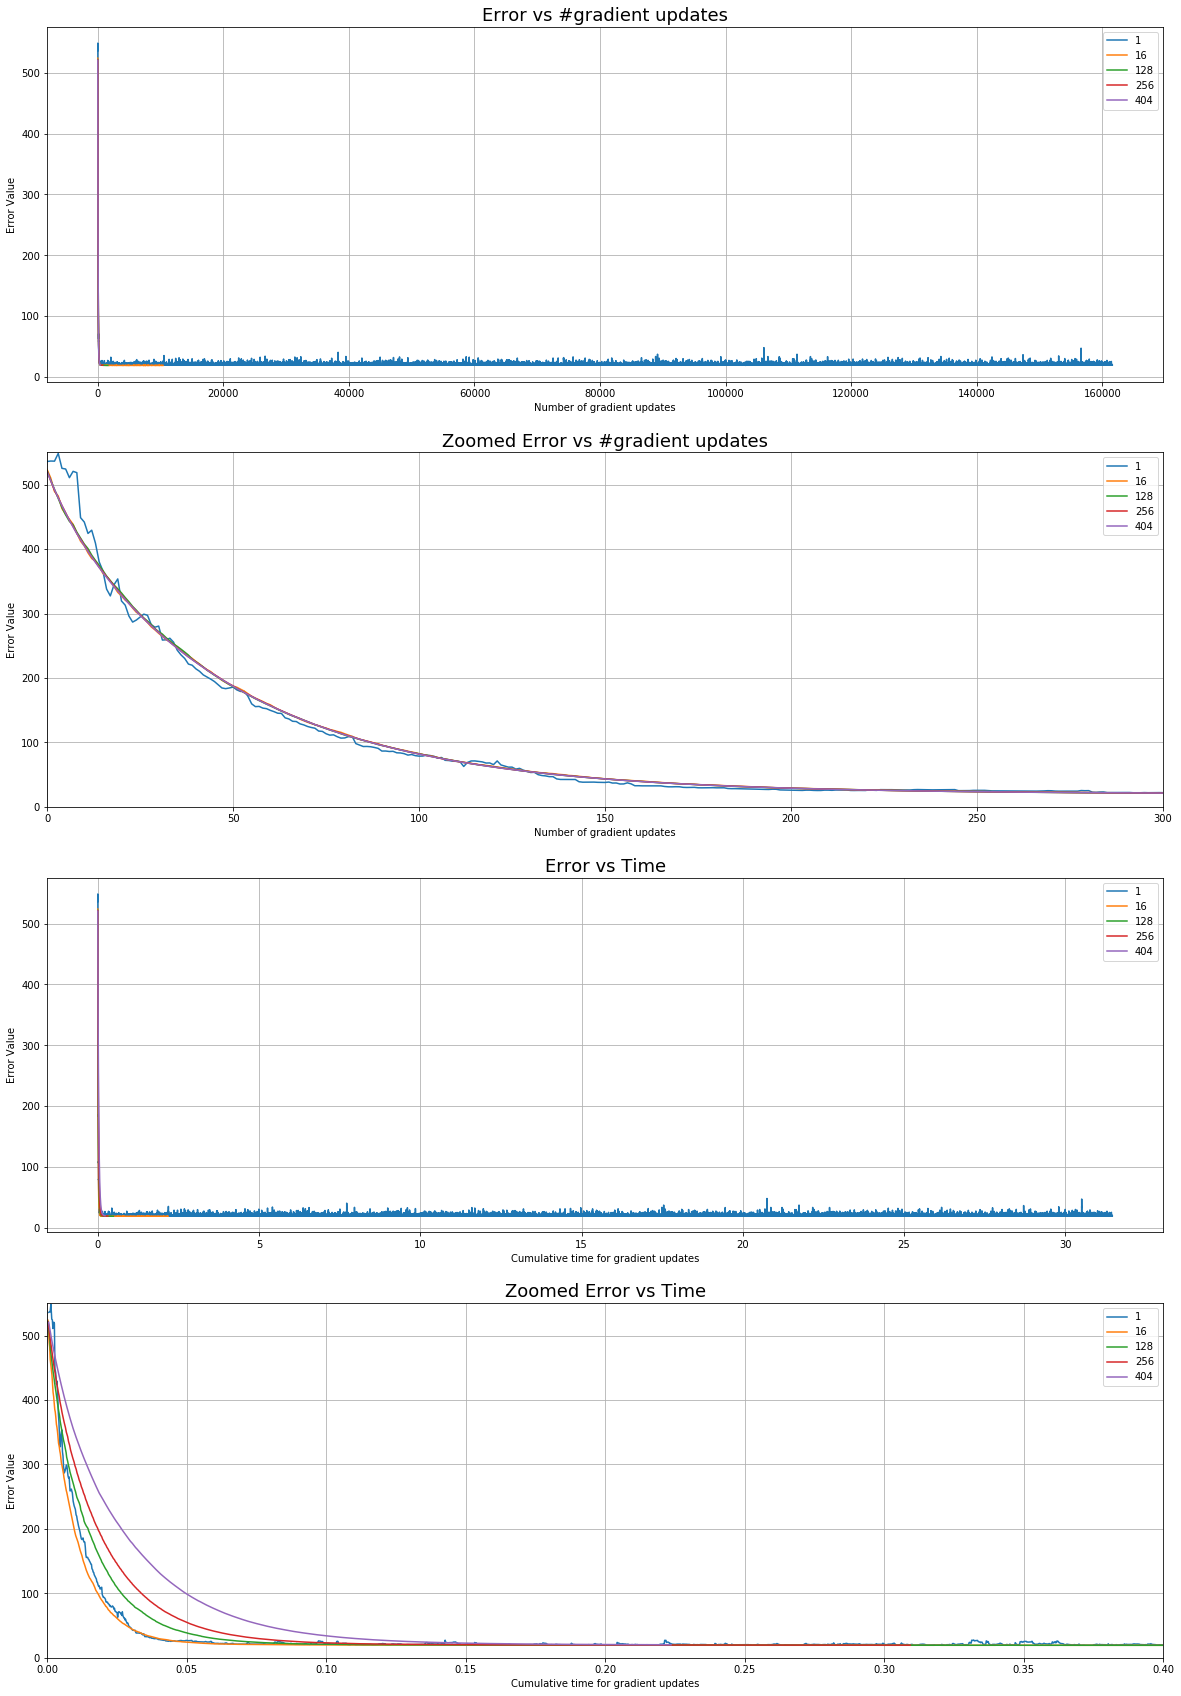

<Figure size 432x288 with 0 Axes>

In [0]:
fig , (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize = (20,30))
btch = ['1', '16', '128', '256', '404']
#Plotting the error and gradient updates
le = len(total_mse_5)
for b in range(le):
  ax1.plot(total_mse_5[b], label = btch[b])
ax1.legend()
ax1.set_title("Error vs #gradient updates", fontsize = 18)
ax1.set_xlabel('Number of gradient updates')
ax1.set_ylabel('Error Value')
ax1.grid()


for b in range(le):
  ax2.plot(total_mse_5[b], label = btch[b])
ax2.legend()
ax2.set_xlim(0,300)
ax2.set_ylim(0,550)
ax2.set_title("Zoomed Error vs #gradient updates", fontsize = 18)
ax2.set_xlabel('Number of gradient updates')
ax2.set_ylabel('Error Value')
ax2.grid()

#Error for time
le_time = len(total_time)
for b in range(le_time):
  ax3.plot(np.cumsum(np.array(total_time[b])), total_mse_5[b], label = btch[b])
ax3.legend()
ax3.set_title("Error vs Time", fontsize = 18)
ax3.set_xlabel('Cumulative time for gradient updates')
ax3.set_ylabel('Error Value')
ax3.grid()

for b in range(le_time):
  ax4.plot(np.cumsum(np.array(total_time[b])), total_mse_5[b], label = btch[b])
ax4.legend()
ax4.set_title("Zoomed Error vs Time", fontsize = 18)
ax4.set_xlabel('Cumulative time for gradient updates')
ax4.set_ylabel('Error Value')
ax4.set_xlim(0,0.4)
ax4.set_ylim(0,550)
ax4.grid()


plt.show()
plt.tight_layout()

### Question 6

1. Switch to absolute error for loss but still use $L_2$ regularization. Derive the gradient for this case, $\frac{\partial}{\partial \theta_j}J(\theta)$. [1.5]


2. Tune $\eta$ and B to obtain good performance (fast convergence to minimum error, but not noisy).  Is it easier to train with squared error or absolute error, why?  Show some plots that help you demonstrate this point and explain. [1]
----> MSE is better than Absolute error because the loss becomes a parabola so it converges more quickly compared to the graph of absolute value created by MAD. It learns more quickly when the loss is high. MSE has nice mathematical properties which makes it easier to compute the gradient. However, Absulte Error requires more complicated tools such as linear programming to compute the gradient.

![Question 6 #1](https://drive.google.com/uc?id=1aEwtHcoXO4HYr5hTSc8t9KxCaHsRh5EB)

In [0]:
#2.
#Using Absolute Error
import time
def batch_gradient_descent_absolute(X,y,batch_size,learning_rate, iterations=100,λ=0):
  np.random.seed(0)
  w_random_6 = np.random.randn(14,1)
  time_history = []
  mse_graddesc_6 = []
  mse_gradientepoch = []
  batch_time = []

  for d in range(iterations):
    data_6 = np.hstack((X,y))
    random_train_data = np.random.permutation(data_6)
    X_train_6 = np.delete(random_train_data,14,1)
    y_train_6 = random_train_data[:, 14]
    X_batch, y_batch = batch(X_train_6, y_train_6, batch_size)

    #For Gradient Descent
    p = len(X_batch)
    for n in range(p):
      start_time = time.time()
      ypredgraddesc_6 = np.dot(np.asarray(X_batch[n]),w_random_6)
      diff = ypredgraddesc_6 - np.asarray(y_batch[n]).reshape(-1,1)
      array_ones = np.sign(diff)
      graddesc = np.dot((np.asarray(X_batch[n]).T, np.array((array_ones.reshape(-1,1))/(2*len(X_batch[n])+2*λ*np.sum(w_random_6)))
      w_random_6 = w_random_6 - learning_rate*(1/len(y_batch[n]))*graddesc 
      mse_graddesc_6.append(mean_squared_error(ypred6, y_train_6))
      stop_time = time.time()
      time_difference = stop_time - start_time
      batch_time.append(time_difference)

    ypred6epoch = np.dot(X_train_6, w_random_6)
    mse_gradientepoch.append(mean_squared_error(ypred5epoch, y_train_6))
  return mse_graddesc_6, mse_gradientepoch, batch_time    

In [0]:
total_mse_6 = []
total_mseepoch_6 = []
total_time_6 = []

for mini_batch in [1,16,128,256,404]:
  mse6 , mseepoch6, btchtime_6 = batch_gradient_descent_absolute(X_train_stdr, y_train, mini_batch, 0.01, iterations = 400)
  total_mse_6.append(mse6)
  total_mseepoch_6.append(mseepoch6)
  total_time_6.append(btchtime)

In [0]:
fig , (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize = (20,30))
btch = ['1', '16', '128', '256', '404']
#Plotting the error and gradient updates
le = len(total_mse_6)
for b in range(le):
  ax1.plot(total_mse_6[b], label = btch[b])
ax1.legend()
ax1.set_title("Error vs #gradient updates", fontsize = 18)
ax1.set_xlabel('Number of gradient updates')
ax1.set_ylabel('Error Value')
ax1.grid()


for b in range(le):
  ax2.plot(total_mse_6[b], label = btch[b])
ax2.legend()
ax2.set_xlim(0,300)
ax2.set_ylim(0,550)
ax2.set_title("Zoomed Error vs #gradient updates", fontsize = 18)
ax2.set_xlabel('Number of gradient updates')
ax2.set_ylabel('Error Value')
ax2.grid()

#Error for time
le_time = len(total_time)
for b in range(le_time):
  ax3.plot(np.cumsum(np.array(total_time[b])), total_mse_6[b], label = btch[b])
ax3.legend()
ax3.set_title("Error vs Time", fontsize = 18)
ax3.set_xlabel('Cumulative time for gradient updates')
ax3.set_ylabel('Error Value')
ax3.grid()

for b in range(le_time):
  ax4.plot(np.cumsum(np.array(total_time[b])), total_mse_6[b], label = btch[b])
ax4.legend()
ax4.set_title("Zoomed Error vs Time", fontsize = 18)
ax4.set_xlabel('Cumulative time for gradient updates')
ax4.set_ylabel('Error Value')
ax4.set_xlim(0,0.4)
ax4.set_ylim(0,550)
ax4.grid()


plt.show()
plt.tight_layout()

In [0]:
#Optimizing Eeta and batch time

total_mse_6 = []
total_mseepoch_6 = []
total_time_6 = []
learning_rate_ar = np.array([1e-6, 1e-5, 1e-4, 1e-3, 0.01,0.1])

for lr in learning_rate_ar:
  for mb in [1,16,128,256,404]:
    mse6 , mseepoch6, btchtime_6 = batch_gradient_descent(X_train_stdr, y_train, learning_rate_ar[lr], mini_batch, iterations = 300)
    total_mse_6.append(mse6)
    total_mseepoch_6.append(mseepoch6)
    total_time_6.append(btchtime)
